# Aplicación del modelo analítico de Mora y Tassara (2019)

In [61]:
import pandas as pd #visualizar y trabajar con datos
import os #acceder a funcionalidades dependientes del Sistema Operativo\
import numpy as np
import matplotlib.pyplot as plt #visualizar datos (graficos, mapas...)
%matplotlib inline
import math #utilizar fórmulas matemáticas (raiz, pi...)

def save_excel_file(df, filename):
    if os.path.isfile(filename):
        print(f"El archivo '{filename}' ya existe aquí")
    else:
        df.to_excel(filename)
        print(f"El archivo '{filename}' se ha guardado")
        
#######################################################################################################################
######################################################################################################################
#######FUNCIÓN PARA PRESIÓN Y PROFUNDIDAD
        
def Zt (DP, ht, Rt, h0 , R0,d=20, p = 900, g = 9.8, υ = 0.25):
    if ((h0*R0**2)-(ht*Rt**2)) != 0:
        Zt = (d/2) - ((4*(d**3) * DP)) / ((3*p*g*(3+υ))*((h0*R0**2)-(ht*Rt**2))) #formula Z de DP
        return Zt
    else:
        return 0
    
    
def cambio_presion(z, ht, Rt,h0,R0, d=20, p = 900, g = 9.8, υ = 0.25): 
    ec = (((3 + υ ) * 3 )/(4 *d**3)) * p * g * ((d/2)-z)
    DP = ec *((h0 * (R0**2))-(ht * ((Rt**2))))
    return DP 

######################################################################################################

r_davies_CM = pd.read_excel('Input//Tabla_radiosfinal_CVMCh.xlsx')
r_davies_VH = pd.read_excel('Input//Tabla_radiosfinal_VH.xlsx')

######################################################################################################
datos_M1_cvmch =pd.read_excel('Input//M1_CVMCh.xlsx')
datos_M1_vh =pd.read_excel('Input//M1_VH.xlsx')

######################################################################################################
datos_M2_5_cvmch =pd.read_excel('Input//data_M2//M2-5_1000_CVMCh.xlsx')
datos_M2_20_cvmch =pd.read_excel('Input//data_M2//M2-20_1000_CVMCh.xlsx')
datos_M2_50_cvmch =pd.read_excel('Input//data_M2//M2-50_1000_CVMCh.xlsx')

datos_M2_5_vh =pd.read_excel('Input//data_M2//M2-5_1000_VH.xlsx')
datos_M2_20_vh =pd.read_excel('Input//data_M2//M2-20_1000_VH.xlsx')
datos_M2_50_vh =pd.read_excel('Input//data_M2//M2-50_1000_VH.xlsx')
######################################################################################################

datos_M3_cvmch =pd.read_excel('Input//data_M3//M3_CVMCh.xlsx')
datos_M3_vh =pd.read_excel('Input//data_M3//M3_VH.xlsx')

###################################################

def plot_estres(tablas):
    fig, ax1 = plt.subplots(figsize=(7, 3))
    n2 = len(tablas)
    colors2 = plt.cm.copper_r(np.linspace(0, 1, n2))
    
    for i, stress in enumerate(tablas):
        tiempo2 = stress['x (años)']
        descompresion2 = stress['y (MPa)']
        profundidad2 = stress['z (km)']

        ax1.plot(tiempo2, profundidad2, color=colors2[i], label=descompresion2[i], linewidth=2)

    ax1.set_xlim(0, 35200)
    ax1.axvline(x=35000, color="grey", linestyle="--", linewidth=1)
    ax1.set_xlabel("Tiempo (años)", labelpad=5, fontsize=10)

    a = [35000, 34800, 30000, 25000, 22000, 20000, 15000, 10000, 5000, 0]
    ax2 = ax1.twiny()
    ax2.invert_xaxis()
    ax2.set_xlim(35.0, -0.2)
    ax2.set_xlabel("Edad (ka)", labelpad=5, fontsize=10)

    ax1.set_ylabel("Profundidad (km)", labelpad=5, fontsize=10)
    ax1.grid(linewidth=0.75, color='grey', linestyle='dotted')
    xmajor_tick = np.arange(0, 35500, 5000)
    xminor_tick = np.arange(0, 35200, 500)
    ax1.set_xticks(xmajor_tick)
    ax1.set_xticks(xminor_tick, minor=True)

    ymajor_tick = np.arange(0, 22, 2)
    yminor_tick = np.arange(0, 20.5, 0.5)
    ax1.set_yticks(ymajor_tick)
    ax1.set_yticks(yminor_tick, minor=True)
    ax1.set_ylim(0, 20)
    ax1.invert_yaxis()
    ax1.set_title("Evolución los cambios de presión en profundidad sobre el CVMCh")

    return fig, ax1

######################################################################################################

def plot_depth_stress(tablas_dpz, tabla_zsegundp, pares):
   
    n = len(tablas_dpz)
    colors = plt.cm.turbo(np.linspace(0,1,n))
    n1 = len(tabla_zsegundp)
    colors1 = plt.cm.turbo(np.linspace(0,1,n1))

    fig, ax  = plt.subplots(figsize=(8, 3))
    
    for i, stress in enumerate(tabla_zsegundp):
        tiempo1 = stress['x (años)']
        descompresion1 = stress['y (MPa)']
        profundidad1 = stress['z (km)']

        ax.plot(descompresion1,profundidad1,color=colors1[i],label = 100*pares[i] )
        ax.set_ylim(0,20)
        ax.set_xlim(-90,90)
        ax.invert_yaxis()
        ax.legend()

    for i,stress in enumerate(tablas_dpz):
        tiempo1 = stress['x (años)']
        descompresion1 = stress['y (MPa)']
        profundidad1 = stress['z (km)']

        ax.axvline(x= 35000,color="grey", linestyle="--",linewidth=1)
        ax.set_xlabel("Cambios de presión (MPa)", labelpad=5, fontsize=10)
        ax.set_ylabel("Profundidad (km)", labelpad=5, fontsize=10)
        ax.grid(linewidth=0.75, color='grey', linestyle='dotted')
        from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

        xmajor_tick = np.arange(-90, 100, 10)
        xminor_tick = np.arange(-90, 92, 2)
        ax.set_xticks(xmajor_tick)
        ax.set_xticks(xminor_tick, minor=True)

        ymajor_tick = np.arange(0, 25, 5)
        yminor_tick = np.arange(0, 21, 1)
        ax.set_yticks(ymajor_tick)
        ax.set_yticks(yminor_tick, minor=True)
        ax.set_ylim(0,20)
        ax.invert_yaxis()
        ax.set_title("Evolución los cambios de presión en profundidad")

    fig.tight_layout()
    
    return fig, ax

3
351


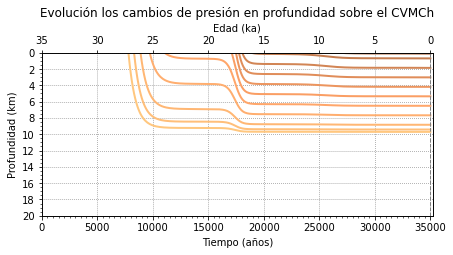

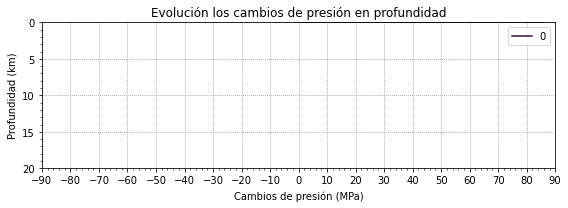

In [73]:

Rt_ht = []
for volcan in [datos_M1_cvmch,datos_M1_vh]:
    Rt_ht.append(list(zip(volcan['Rt'],volcan['ht'])))
    
CVMCh = Rt_ht[0]
VH = Rt_ht[1]
tiempo =  datos_M1_cvmch["tiempo"]

#########################################
############## CVMCh ##################
#########################################
DPs_mc = [2.5, 5, 10, 20, 30, 40, 50, 60, 70, 80, 85, 90, 100, 150, 200, 250, 300, 350, 400, 500, 550, 600, 700, 750, 800]

DPs_mc = [dp * (10 ** 6) for dp in DPs_mc]
p = 900
g = 9.8
υ = 0.25
d = 20

CVMCh = datos_M1_cvmch[['Rt', 'ht']].values.tolist()

# Calcular dp_zts_mc
dp_zts_mc = []
for dp in DPs_mc:
    zts = []
    
    for t in CVMCh:
        z = Zt(dp, ht=t[1]*1000 , Rt=t[0] , h0 = ((CVMCh[0][1])*1000), R0= CVMCh[0][0],d=20, p = 900, g = 9.8, υ = 0.25 )

        zts.append(z)
    dp_zts_mc.append(zts)

x1 = tiempo
x2 = tiempo[::-1]
stress_mc = DPs_mc
z_vh= dp_zts_mc

tablas_cvmch = []  # 10 tablas 0-9

for i in range(len(stress_mc)):
    data_cvmvh = pd.DataFrame()
    data_cvmvh['x (años)'] = x1
    data_cvmvh['y (MPa)'] = stress_mc[i]/1000000
    data_cvmvh['z (km)'] = z_vh[i]
    data_cvmvh['radio hielo(km)'] = datos_M1_cvmch['Rt']
    data_cvmvh['espesor hielo(km)'] = datos_M1_cvmch['ht']
    tablas_cvmch.append(data_cvmvh)

tablas_cvmch

#########################################
###############  CVMCh  #################
#############PROFUNDIDAD ################
#########################################

zetas= [0 ,10,20]
x1 = tiempo
x2 = tiempo[::-1]
h0_mc= CVMCh[0][1]
R0_mc= CVMCh[0][0]

zts_dp_mc = []

for z in zetas:
    dp = []
    for t in CVMCh:
        dps = cambio_presion(z, ht=t[1]*1000 , Rt=t[0] , h0 = h0_mc*1000, R0= R0_mc, d=20, p = 900, g = 9.8, υ = 0.25)
        dp.append(dps)
    zts_dp_mc.append(dp)

print(len(zts_dp_mc))   
zts_dp_mc # presiones a una determinado tiempo y profundidad
stress_mc = zts_dp_mc
z_mc = zetas

tablas_mc=[]
for i in range(len(zts_dp_mc)):
    data_mc = pd.DataFrame()
    data_mc['x (años)'] = x1
    data_mc['y (MPa)'] = [stress_mc[i][a]/1000000 for a in range(len(x1))]
    data_mc['z (km)'] = z_mc[i]
    data_mc['radio hielo(km)'] = datos_M1_cvmch['Rt']
    data_mc['espesor hielo(km)'] = datos_M1_cvmch['ht']
    tablas_mc.append(data_mc)

print(len(tablas_mc[0]))
##############################

####################################################################################################
###################################################################################################
plot_estres(tablas_cvmch)
####################################################################################################
###################################################################################################

## tablas

tablas_dpz = tablas_mc

pares =[]
for n in range (int(len(tablas_dpz)/50)+1):
    par = n*50
    pares.append(par)
    
tabla_zsegundp=[]
for par in pares:
    tabla_zsegundp.append (tablas_dpz[par])

###########
n = len(tablas_dpz)
colors = plt.cm.turbo(np.linspace(0,1,n))
n1 = len(tabla_zsegundp)
colors1 = plt.cm.turbo(np.linspace(0,1,n1))



fig, ax  = plt.subplots(figsize=(8, 3))
for i, stress in enumerate(tabla_zsegundp):
    tiempo1 = stress['x (años)']
    descompresion1 = stress['y (MPa)']
    profundidad1 = stress['z (km)']

    ax.plot(descompresion1,profundidad1,color=colors1[i],label = 100*pares[i] )
    ax.set_ylim(0,20)
    ax.set_xlim(-90,90)
    ax.invert_yaxis()
    ax.legend()
    
for i,stress in enumerate(tablas_dpz):
    tiempo1 = stress['x (años)']
    descompresion1 = stress['y (MPa)']
    profundidad1 = stress['z (km)']
    
    #ax.plot(descompresion1,profundidad1,color=colors[i],linewidth=1)
    
    ax.axvline(x= 35000,color="grey", linestyle="--",linewidth=1)
    ax.set_xlabel("Cambios de presión (MPa)", labelpad=5, fontsize=10)
    ax.set_ylabel("Profundidad (km)", labelpad=5, fontsize=10)
    ax.grid(linewidth=0.75, color='grey', linestyle='dotted')
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

    xmajor_tick = np.arange(-90, 100, 10)
    xminor_tick = np.arange(-90, 92, 2)
    ax.set_xticks(xmajor_tick)
    ax.set_xticks(xminor_tick, minor=True)

    ymajor_tick = np.arange(0, 25, 5)
    yminor_tick = np.arange(0, 21, 1)
    ax.set_yticks(ymajor_tick)
    ax.set_yticks(yminor_tick, minor=True)
    ax.set_ylim(0,20)
    ax.invert_yaxis()
    ax.set_title("Evolución los cambios de presión en profundidad")
fig.tight_layout()